In [3]:
import pandas as pd

In [6]:
data1 = pd.read_csv('loan_approval_dataset.csv')

In [8]:
data1.drop(columns =['loan_id'], inplace=True)
data1.columns = data1.columns.str.strip()

In [11]:
data1['Assets'] = data1.residential_assets_value + data1.commercial_assets_value+ data1.luxury_assets_value + data1.bank_asset_value

In [13]:
data1.drop(columns = ['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value'],inplace=True)

In [16]:
data1.drop(data1[(data1['loan_status'] == ' Approved') & (data1['cibil_score'] <= 600)].index, inplace=True)

In [19]:
data1.drop(data1[(data1['loan_status'] == ' Approved') & (data1['loan_term'] <= 6)].index, inplace=True)

In [22]:
def clean_data(st):
    st = st.strip()
    return st

In [25]:
data1.education = data1.education.apply(clean_data)

In [29]:
data1.education = data1['education'].replace(['Graduate', 'Not Graduate'],[1,0])

In [32]:
data1.self_employed = data1.self_employed.apply(clean_data)

In [37]:
data1.self_employed = data1['self_employed'].replace(['No', 'Yes'],[0,1])

In [40]:
data1.loan_status = data1.loan_status.apply(clean_data)

In [45]:
data1.loan_status = data1.loan_status.replace(['Rejected', 'Approved'],[0,1])

In [50]:
print(data1.dtypes)

no_of_dependents    int64
education           int64
self_employed       int64
income_annum        int64
loan_amount         int64
loan_term           int64
cibil_score         int64
loan_status         int64
Assets              int64
dtype: object


In [52]:
from sklearn.model_selection import train_test_split

In [79]:
input_data1 = data1.drop(columns=['loan_status'])
output_data1 = data1['loan_status']

In [81]:
x_train,x_test,y_train,y_test = train_test_split(input_data1,output_data1, test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2451, 8), (613, 8), (2451,), (613,))

In [83]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [87]:
from xgboost import XGBClassifier

In [89]:
model = XGBClassifier()

In [91]:
model.fit(x_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [93]:
accuracy = model.score(x_train_scaled,y_train)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00


In [95]:
accuracy = model.score(x_test_scaled,y_test)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.99


In [99]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
Y_pred = model.predict(x_test_scaled)

In [101]:
report = classification_report(y_test,Y_pred, zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       332
           1       0.99      1.00      0.99       281

    accuracy                           0.99       613
   macro avg       0.99      0.99      0.99       613
weighted avg       0.99      0.99      0.99       613



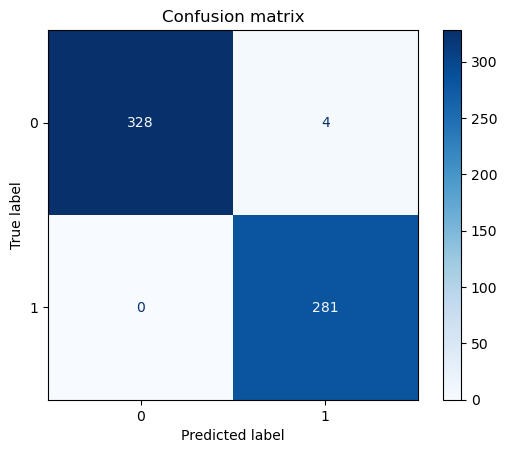

In [103]:
report1 = confusion_matrix(y_test,Y_pred)
dis = ConfusionMatrixDisplay(confusion_matrix=report1)
import matplotlib.pyplot as plt
dis.plot(cmap="Blues")
plt.title("Confusion matrix")
plt.savefig("confusion_matrix xgboosting.png", dpi=300, bbox_inches="tight")
plt.show()

In [110]:
pred_data = pd.DataFrame([['2','0','0','9600000','29900000','12','778','50700000']],columns=['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'Assets'])
pred_data = scaler.transform(pred_data)
model.predict(pred_data)

array([1])

In [112]:
import pickle as pk

In [114]:
pk.dump(model, open('model.plk','wb'))

In [116]:
pk.dump(scaler, open('scaler.plk','wb'))